In [1]:
import pandas as pd
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from tqdm.notebook import tqdm
import seaborn as sns
from nltk.corpus import stopwords
import gc
gc.enable()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle_dataset/cleaned_dataset_1.csv')[['Title', 'Instructions', 'Cleaned_Ingredients']]
df = df[df.Title.notna()]
df.head()

,Title,Instructions,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...","['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [3]:
lst = df.Cleaned_Ingredients.tolist()

In [4]:
# lst

In [5]:
len(lst)

13496

In [6]:
[len(x) for x in lst[0].replace('[', ',').replace(']', ',').strip().split(',')]

[0,
 28,
 21,
 8,
 11,
 43,
 30,
 34,
 25,
 7,
 31,
 25,
 37,
 30,
 40,
 37,
 65,
 6,
 20,
 33,
 19,
 15,
 30,
 21,
 26,
 25,
 18,
 23,
 32,
 20,
 14,
 24,
 0]

In [7]:
def func(x):
    temp = x.replace('[', ',').replace(']', ',').replace("\"","").strip().split(',')
    res = []
    for i in temp:
        if len(i):
            res.append(i)
    return res

In [8]:
xlst = [func(i) for i in lst]

In [9]:
xlst

[["'1 (3½–4-lb.) whole chicken'",
  " '2¾ tsp. kosher salt",
  ' divided',
  " plus more'",
  " '2 small acorn squash (about 3 lb. total)'",
  " '2 Tbsp. finely chopped sage'",
  " '1 Tbsp. finely chopped rosemary'",
  " '6 Tbsp. unsalted butter",
  ' melted',
  " plus 3 Tbsp. room temperature'",
  " '¼ tsp. ground allspice'",
  " 'Pinch of crushed red pepper flakes'",
  " 'Freshly ground black pepper'",
  " '⅓ loaf good-quality sturdy white bread",
  " torn into 1 pieces (about 2½ cups)'",
  " '2 medium apples (such as Gala or Pink Lady; about 14 oz. total)",
  ' cored',
  " cut into 1 pieces'",
  " '2 Tbsp. extra-virgin olive oil'",
  " '½ small red onion",
  " thinly sliced'",
  " '3 Tbsp. apple cider vinegar'",
  " '1 Tbsp. white miso'",
  " '¼ cup all-purpose flour'",
  " '2 Tbsp. unsalted butter",
  " room temperature'",
  " '¼ cup dry white wine'",
  " '2 cups unsalted chicken broth'",
  " '2 tsp. white miso'",
  " 'Kosher salt'",
  " 'freshly ground pepper'"],
 ["'2 large egg w

In [10]:
tokenizer = PunktSentenceTokenizer(" ".join([" ".join(i) for i in xlst]))


tagged = []

for i in tqdm(xlst):
    temp_2 = []
    for j in i:
        tokenized = tokenizer.tokenize(j.replace("'", ""))
    #     print(tokenized)
        temp = []
        for idx, x in enumerate(tokenized):
#             print(temp)
            words = nltk.word_tokenize(x)
    #         print(words)
            temp += nltk.pos_tag(words)
#         print(temp)
        temp_2.append(temp)
#     print(len(temp_2), len(temp_2[0]))
    tagged.append(temp_2)
    
    

In [11]:
len(tagged)

13496

In [12]:
tagged[4]

[[('1', 'CD'),
  ('teaspoon', 'NN'),
  ('dark', 'NN'),
  ('brown', 'NN'),
  ('sugar', 'NN')],
 [('1', 'CD'), ('teaspoon', 'NN'), ('hot', 'JJ'), ('water', 'NN')],
 [('1', 'CD'), ('½', 'JJ'), ('oz', 'NN'), ('.', '.'), ('bourbon', 'NN')],
 [('½', 'JJ'),
  ('oz', 'NN'),
  ('.', '.'),
  ('fresh', 'JJ'),
  ('lemon', 'NN'),
  ('juice', 'NN')],
 [('2', 'CD'),
  ('teaspoons', 'NNS'),
  ('apple', 'NN'),
  ('butter', 'NN'),
  ('(', '('),
  ('storebought', 'JJ'),
  ('or', 'CC'),
  ('homemade', 'NN'),
  (')', ')')],
 [('Garnish', 'JJ'),
  (':', ':'),
  ('orange', 'NN'),
  ('twist', 'NN'),
  ('and', 'CC'),
  ('freshly', 'RB'),
  ('grated', 'VBD'),
  ('or', 'CC'),
  ('ground', 'NN'),
  ('cinnamon', 'NN')]]

In [13]:
tagged[4]

[[('1', 'CD'),
  ('teaspoon', 'NN'),
  ('dark', 'NN'),
  ('brown', 'NN'),
  ('sugar', 'NN')],
 [('1', 'CD'), ('teaspoon', 'NN'), ('hot', 'JJ'), ('water', 'NN')],
 [('1', 'CD'), ('½', 'JJ'), ('oz', 'NN'), ('.', '.'), ('bourbon', 'NN')],
 [('½', 'JJ'),
  ('oz', 'NN'),
  ('.', '.'),
  ('fresh', 'JJ'),
  ('lemon', 'NN'),
  ('juice', 'NN')],
 [('2', 'CD'),
  ('teaspoons', 'NNS'),
  ('apple', 'NN'),
  ('butter', 'NN'),
  ('(', '('),
  ('storebought', 'JJ'),
  ('or', 'CC'),
  ('homemade', 'NN'),
  (')', ')')],
 [('Garnish', 'JJ'),
  (':', ':'),
  ('orange', 'NN'),
  ('twist', 'NN'),
  ('and', 'CC'),
  ('freshly', 'RB'),
  ('grated', 'VBD'),
  ('or', 'CC'),
  ('ground', 'NN'),
  ('cinnamon', 'NN')]]

In [14]:
negative_words = set(['oz', 'tsp', 'teaspoon', 'lb', 'piece', 'cup', 'medium', 'tbsp'] + 
                     stopwords.words('english'))

In [15]:
class MergeTokens(object):
    def __init__(self):
        self.ings = set()
    
    def __validate_logic(self, ings):
        if len(ings) < 2: return 
        pass
    def get_new_ingredients(self, ings):
        """
        ings for a single dish
        """
        
        result = self.__validate_logic(ings)
        if result == None:
            self.ings.add(ings)
            return ings
        
        return result

In [16]:
sents = []
for tagged_sents in tagged:
#     print(len(tagged_sents), tagged_sents)
    ss = []
    for sent in tagged_sents:
        sss = []
        for token in sent:
            t = token[0].lower()
            if token[1] == 'NN' and t not in negative_words and t.isalpha():
                sss.append(t)
        if len(sss): ss.append(sss)
    sents.append(ss)
len(sents), sents

(13496,
 [[['chicken'],
   ['kosher', 'salt'],
   ['squash', 'total'],
   ['sage'],
   ['butter'],
   ['room', 'temperature'],
   ['ground', 'allspice'],
   ['pinch', 'pepper'],
   ['ground', 'pepper'],
   ['bread'],
   ['total'],
   ['oil'],
   ['onion'],
   ['apple', 'cider', 'vinegar'],
   ['miso'],
   ['flour'],
   ['butter'],
   ['room', 'temperature'],
   ['wine'],
   ['chicken', 'broth'],
   ['miso'],
   ['salt'],
   ['ground', 'pepper']],
  [['egg'],
   ['pound', 'inch', 'diameter'],
   ['salt'],
   ['pepper'],
   ['thyme'],
   ['parsley']],
  [['milk'],
   ['milk'],
   ['powder'],
   ['onion', 'powder'],
   ['paprika'],
   ['ground', 'pepper'],
   ['kosher', 'salt'],
   ['cheddar'],
   ['cream', 'cheese'],
   ['elbow', 'macaroni']],
  [['round', 'loaf'],
   ['oil'],
   ['sausage'],
   ['stick', 'butter'],
   ['cut'],
   ['chopped'],
   ['celery', 'ribs'],
   ['chopped'],
   ['cream'],
   ['turkey', 'giblet', 'stock', 'broth'],
   ['parsley'],
   ['ceramic', 'glass', 'baking', 

In [17]:
j = []
for sent in sents:
    i = []
    for ingredient in sent:
        i.append( " ".join(ingredient))
    j.append(",".join(i))
print(j[:100])

['chicken,kosher salt,squash total,sage,butter,room temperature,ground allspice,pinch pepper,ground pepper,bread,total,oil,onion,apple cider vinegar,miso,flour,butter,room temperature,wine,chicken broth,miso,salt,ground pepper', 'egg,pound inch diameter,salt,pepper,thyme,parsley', 'milk,milk,powder,onion powder,paprika,ground pepper,kosher salt,cheddar,cream cheese,elbow macaroni', 'round loaf,oil,sausage,stick butter,cut,chopped,celery ribs,chopped,cream,turkey giblet stock broth,parsley,ceramic glass baking dish', 'dark brown sugar,water,bourbon,lemon juice,apple butter homemade,orange twist ground cinnamon', 'tea,reposado tequila,lemon juice,nectar', 'pat butter,apple cider,lemon juice,sweetness cider,ground pink,lemon', 'sugar,ground turmeric,sherry,bourbon,rum,scotch,lemon juice,lemon wheel', 'dal,masoor dal,dal,jasmine rice rice,pearl barley,lamb stew meat,kosher salt,ginger,ghee oil,garam masala,cayenne pepper,ground turmeric,cilantro,onion,cut', 'soup,onion,turmeric,cumin,peppe

In [18]:

gc.collect()

42

In [19]:
len(j)

13496

In [20]:
df['cleaned'] = j

In [21]:
df

,Title,Instructions,Cleaned_Ingredients,cleaned
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...","['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","chicken,kosher salt,squash total,sage,butter,r..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,"['2 large egg whites', '1 pound new potatoes (...","egg,pound inch diameter,salt,pepper,thyme,parsley"
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,"['1 cup evaporated milk', '1 cup whole milk', ...","milk,milk,powder,onion powder,paprika,ground p..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,"['1 (¾- to 1-pound) round Italian loaf, cut in...","round loaf,oil,sausage,stick butter,cut,choppe..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","dark brown sugar,water,bourbon,lemon juice,app..."
...,...,...,...,...
13496,Brownie Pudding Cake,Preheat the oven to 350°F. Into a bowl sift to...,"['1 cup all-purpose flour', '2/3 cup unsweeten...","flour,cocoa powder,baking powder,salt,sugar,st..."
13497,Israeli Couscous with Roasted Butternut Squash...,Preheat oven to 475°F.\nHalve lemons and scoop...,"['1 preserved lemon', '1 1/2 pound butternut s...","lemon,pound butternut squash,dice,oil,onion,ch..."
13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,"If using katsuo bushi flakes from package, moi...",['Leftover katsuo bushi (dried bonito flakes) ...,katsuo bushi bonito dashi katsuo bushi fresh p...
13499,Spanakopita,Melt 1 tablespoon butter in a 12-inch heavy sk...,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,"stick tablespoon butter,baby spinach,feta,phyllo"


In [22]:
df.isnull().sum()

Title                  0
Instructions           3
Cleaned_Ingredients    0
cleaned                0
dtype: int64

In [23]:
df[df['Cleaned_Ingredients'].str.contains('large eggs')]

,Title,Instructions,Cleaned_Ingredients,cleaned
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,"['1 (¾- to 1-pound) round Italian loaf, cut in...","round loaf,oil,sausage,stick butter,cut,choppe..."
9,Spiced Lentil and Caramelized Onion Baked Eggs,"Place an oven rack in the center of the oven, ...","['1 (14.5-ounce) can basic lentil soup, like A...","soup,onion,turmeric,cumin,pepper pepper,tomato..."
24,Sloppy Joe Shirred Eggs With Spinach,Preheat your oven to 400°F. Combine the carrot...,"['1 medium carrot, top removed and cut into ab...","carrot,oil,spinach,salt,pound ground turkey,gr..."
39,Best Deviled Eggs,Cover eggs with cold water by 1 1/2 inches in ...,"['6 large eggs', '1/4 cup mayonnaise', '1 teas...","mayonnaise,mustard,cayenne,paprika,bag star tip"
42,Pumpkin Dutch Baby With Pumpkin Butter,Place an 8-inch ovenproof skillet or cast-iron...,"['3 large eggs, room temperature', '1 (15-ounc...","room temperature,purée,milk,room temperature,b..."
...,...,...,...,...
13491,"Tomato, Garlic, and Potato Frittata","Whisk together whole eggs, whites, 1/4 cup par...","['6 whole large eggs', '2 large egg whites', '...","egg,parmesan,basil,salt,pepper,oil,pound boili..."
13492,Cornmeal Pancakes with Honey-Pecan Butter,"Using electric mixer, beat 1/2 cup butter, hon...",['1/2 cup (1 stick) unsalted European-style bu...,"stick butter,room temperature,honey,pinch grou..."
13493,Chocolate Heart Layer Cake with Chocolate-Cinn...,Preheat oven to 400°F. Place 8x8x2-inch heart-...,"['4 tablespoons unsalted butter, melted', '1/3...","butter,cocoa powder,salt,sugar,whipping cream,..."
13494,Ginger-Pecan Roulade with Honey-Glazed Pecans,Preheat oven to 350°F. Line bottom and sides o...,"['1/2 stick (1/4 cup) unsalted butter, melted,...","stick butter,pan,tablespoon cocoa powder,groun..."


In [24]:
df[df.cleaned.str.len() == 0]

,Title,Instructions,Cleaned_Ingredients,cleaned
537,Fearless Sous Vide Poached Eggs,Clip (or stand) sous vide machine to a tall la...,['6 large eggs'],
767,Big-Batch Hard-Boiled Eggs,"Fill a large pot with 1"" water and fit a steam...",['24 large eggs'],
1778,Nut Butter,Preheat the oven to 300°F / 180°C.\nSpread the...,['2 cups (about 280g) shelled raw nuts'],
1858,Vegan Banana Ice Cream,"If using fresh bananas, peel, then arrange in ...",['4 large very ripe or frozen bananas'],
2083,Jammy Soft-Boiled Eggs,Bring a large saucepan of water to a boil over...,['4–8 large eggs'],
2091,Hard-Boiled Eggs,Bring a large saucepan of water to a boil over...,['4–8 large eggs'],
2724,DIY Dried Chiles,Preheat oven to 150ºF. Arrange chiles in a sin...,['Assorted fresh red chiles'],
3212,Sprouted Red Lentils,Rinse lentils in cold water; drain. Repeat 2 m...,['1 cup red lentils'],
4045,Sticky and Sweet Popcorn,Preheat the oven to 250°F. Line two baking she...,"['12 cups Popped Popcorn', '1 cup Butter', '2 ...",
5606,Sautéed Shishito Peppers: Summer's Best New Bite,Here's what you do. Heat a little olive oil in...,[''],


In [25]:
def fix_cleaned(x):
    if len(x[1]): return x[1]
    return x[0].replace('[', '').replace(']', '')
df['cleaned'] = df[['Cleaned_Ingredients', 'cleaned']].apply(fix_cleaned, axis=1)

In [26]:
df.isnull().sum()

Title                  0
Instructions           3
Cleaned_Ingredients    0
cleaned                0
dtype: int64

In [27]:
def fix_Ingredients(x):
    if pd.isna(x[1]): return x[0]
    return x[1]
df['Instructions'] = df[['cleaned', 'Instructions']].apply(fix_Ingredients, axis=1)

In [28]:
df.isnull().sum()

Title                  0
Instructions           0
Cleaned_Ingredients    0
cleaned                0
dtype: int64

In [29]:
df.loc[4].values[3]

'dark brown sugar,water,bourbon,lemon juice,apple butter homemade,orange twist ground cinnamon'

In [30]:
all_ings = set()
length = 0
for i in df.cleaned.str.split(','):
    length += len(i)
    for j in i:
        all_ings.add(j)
        

In [31]:
len(all_ings), length

(13533, 138430)

In [32]:
all_ings

{'shortening butter',
 'mint thyme',
 'blade slicer baking dish',
 'rib lamb inch thick',
 'english seedless',
 'left',
 'paper lantern',
 'tablespoon water lime juice',
 'tablespoon coconut rum',
 'walnut oil oil',
 'pepper gochugaru pepper',
 'cream crème anglaise',
 'accompaniment tomato salsa',
 'raspberry syrup',
 'bacon',
 'meal ground',
 'milk section grocery',
 'g brown sugar',
 'glass metal dish',
 'shrimp lengthwise',
 'salmon fillet skin thick',
 'dash',
 'refrigerator',
 'skinless pork shoulder',
 'tablespoon grain mustard',
 'dough pie',
 'lime syrup food coloring',
 'ml sauce',
 'calabaza squash',
 'lemon thyme thyme',
 'boneless ribs',
 'mini bell',
 'lemon juice lemon',
 'bay leaf',
 'lavender',
 'wafer crumbs',
 'sourdough peasant bread',
 'tapioca pearls section',
 'finger',
 'ounce maraschino liqueur',
 'tablespoon coconut blossom nectar maple syrup sweetener choice',
 'paper paper pin',
 'mackerel skin thick',
 'jigger juice',
 'tablespoon oregano',
 'baking pan off

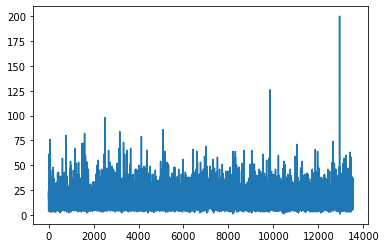

In [33]:
plt.plot([len(i) for i in all_ings])

In [34]:
df.to_csv('kaggle_dataset/ingredients_modified.csv', index=False)